In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interact_manual
from IPython.display import display

plt.rcParams['figure.figsize']=(16,8)
plt.style.use('fivethirtyeight')

In [3]:
#read dataset
jobs = pd.read_csv('jobs.csv')

In [4]:
#dataset shape
jobs.shape

(66, 14)

In [5]:
#checking for null values
jobs.isnull().sum().sum()

0

In [6]:
jobs.head(10)

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
5,6,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3,PG02
6,7,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3,PG03
7,8,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5,PG04
8,9,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7,PG05
9,10,3,Baker,10,Baker I,4,2,0,1,4,1,1,2,PG04


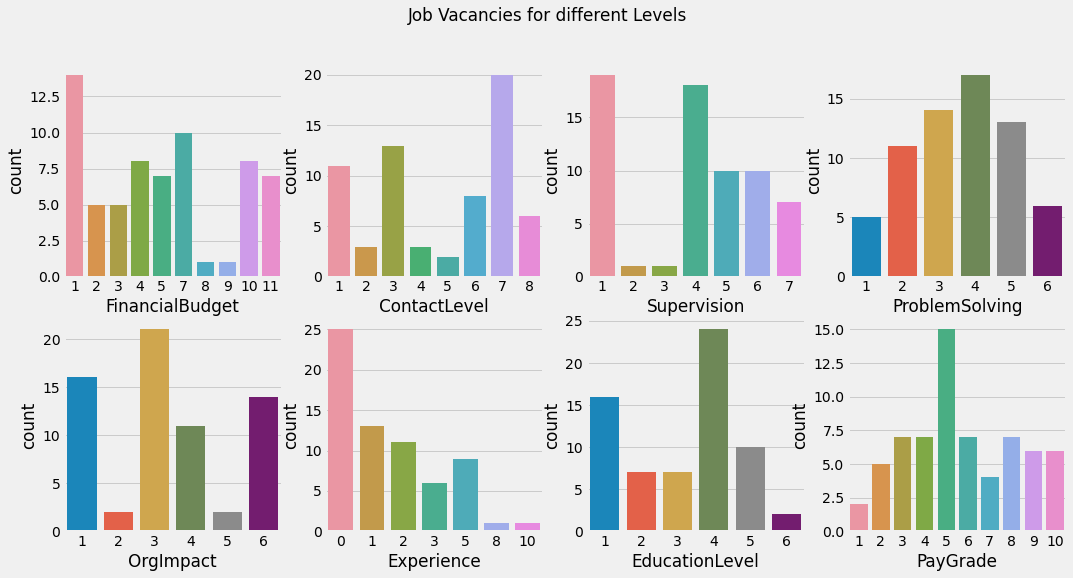

In [7]:
plt.subplot(241)
sns.countplot(jobs['FinancialBudget'])

plt.subplot(242)
sns.countplot(jobs['ContactLevel'])

plt.subplot(243)
sns.countplot(jobs['Supervision'])

plt.subplot(244)
sns.countplot(jobs['ProblemSolving'])

plt.subplot(245)
sns.countplot(jobs['OrgImpact'])

plt.subplot(246)
sns.countplot(jobs['Experience'])

plt.subplot(247)
sns.countplot(jobs['EducationLevel'])

plt.subplot(248)
sns.countplot(jobs['PayGrade'])

plt.suptitle('Job Vacancies for different Levels',)
plt.show()

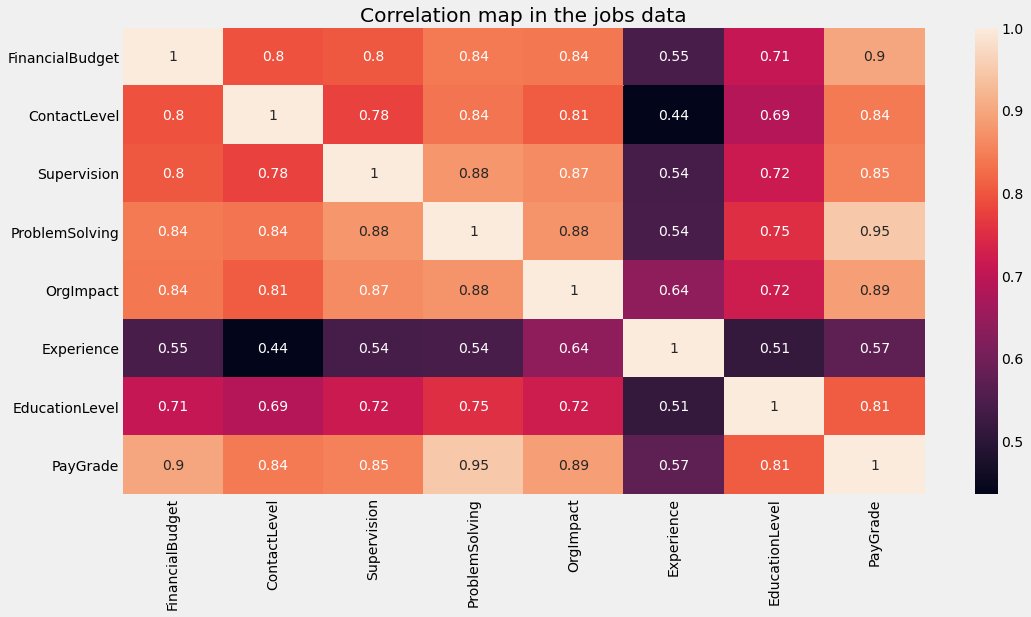

In [9]:
sns.heatmap(jobs[['FinancialBudget', 'ContactLevel', 'Supervision', 'ProblemSolving', 'OrgImpact', 'Experience',
                 'EducationLevel', 'PayGrade']].corr(), annot=True)
plt.title('Correlation map in the jobs data')
plt.show()

In [10]:
#group the data based on jobtitle

x=jobs.groupby(['JobFamilyDescription']).agg('mean')
x.drop(['ID','JobFamily','JobClass'], axis=1, inplace=True)
x.style.background_gradient(cmap = 'Reds')

,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
JobFamilyDescription,,,,,,,,
Accounting And Finance,7.250000,4.000000,2.250000,5.000000,4.500000,5.500000,6.250000,8.250000
Administrative Support,3.000000,2.200000,0.600000,1.600000,1.800000,1.800000,3.200000,3.800000
Baker,6.333333,2.000000,0.000000,2.666667,4.333333,2.333333,4.333333,5.333333
Buildings And Facilities,5.500000,2.375000,0.500000,3.000000,3.750000,4.125000,5.000000,5.000000
Buyer,7.333333,3.333333,3.666667,5.000000,4.333333,5.333333,5.666667,7.333333
Cashier,3.333333,2.666667,2.333333,2.666667,2.666667,3.666667,3.333333,3.000000
Communications And Media,4.500000,2.500000,0.300000,2.000000,2.900000,2.800000,4.000000,3.800000
Corporate Research,5.800000,4.000000,2.400000,3.400000,3.600000,3.800000,3.400000,5.200000
Finance And Accounting,6.666667,4.000000,2.000000,4.000000,4.333333,5.000000,5.333333,7.333333


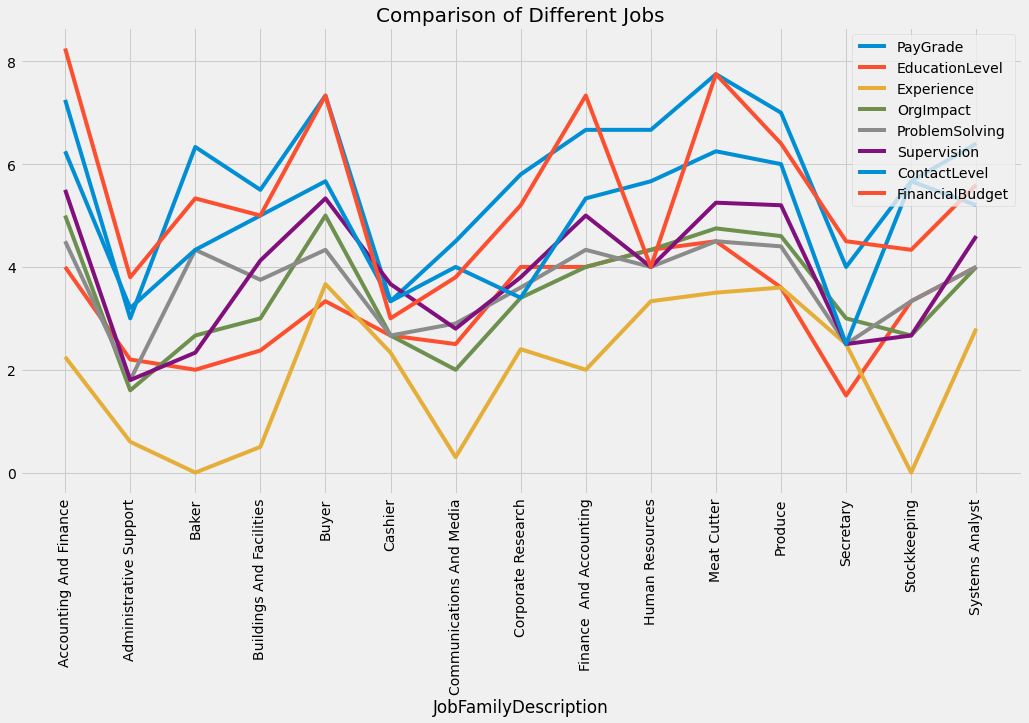

In [15]:
x.plot()
plt.xticks(np.arange(15), ('Accounting And Finance', 'Administrative Support', 'Baker',
       'Buildings And Facilities', 'Buyer', 'Cashier',
       'Communications And Media', 'Corporate Research',
       'Finance  And Accounting', 'Human Resources', 'Meat Cutter', 'Produce',
       'Secretary', 'Stockkeeping', 'Systems Analyst'),
        rotation = 90)
plt.title('Comparison of Different Jobs', fontsize = 20)
plt.show()

In [16]:
@interact_manual
def check(column = jobs.select_dtypes('number').columns[3:],
          column1 = jobs.select_dtypes('number').columns[4:],):
    sns.barplot(jobs[column], jobs[column1])
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Dropdown(description='column', options=('PayGrade', 'EducationLevel', 'Experience', 'Org…